In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("final_data(night).csv")
data.head()

,Time,P,R,G,B,Occupant
0,51:57.5,253,6,17,68,N
1,51:58.1,253,5,17,68,N
2,51:58.6,255,5,16,67,N
3,51:59.0,254,5,17,67,N
4,51:59.6,254,5,17,68,N


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time      378 non-null    object
 1   P         378 non-null    int64 
 2   R         378 non-null    int64 
 3   G         378 non-null    int64 
 4   B         378 non-null    int64 
 5   Occupant  378 non-null    object
dtypes: int64(4), object(2)
memory usage: 17.8+ KB


In [4]:
data['Occupant'].unique()

array(['N', 'Y'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
data['Occupant'] = le.fit_transform(data['Occupant'])
data['Occupant'].unique()

array([0, 1])

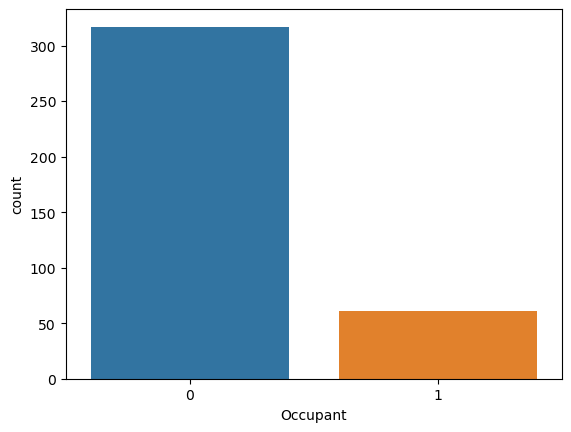

In [7]:
sns.countplot(x = 'Occupant', data =data)
plt.show()

In [8]:
data['Occupant'].value_counts()

0    317
1     61
Name: Occupant, dtype: int64

In [9]:
y = data['Occupant']

In [10]:
x = data.iloc[:,:]
del x['Occupant']
del x['Time']

In [11]:
x,y

(       P  R   G   B
 0    253  6  17  68
 1    253  5  17  68
 2    255  5  16  67
 3    254  5  17  67
 4    254  5  17  68
 ..   ... ..  ..  ..
 373  254  5  17  67
 374  253  5  17  68
 375  255  5  17  67
 376  253  5  17  67
 377  255  5  17  68
 
 [378 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 373    0
 374    0
 375    0
 376    0
 377    0
 Name: Occupant, Length: 378, dtype: int32)

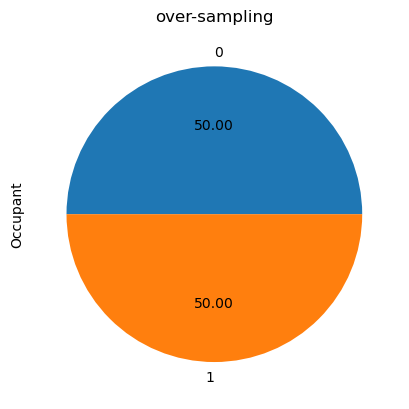

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'not majority')
x_res,y_res = ros.fit_resample(x,y)
a = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = a.set_title('over-sampling')

In [13]:
y_res.value_counts()

0    317
1    317
Name: Occupant, dtype: int64

In [14]:
x_res.value_counts()

P    R   G   B 
254  5   17  68    66
253  5   17  68    61
254  5   17  67    57
253  5   17  67    51
255  5   17  68    23
                   ..
254  5   17  66     1
253  8   20  71     1
252  7   18  68     1
     11  22  74     1
254  5   18  69     1
Length: 82, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P       378 non-null    int64
 1   R       378 non-null    int64
 2   G       378 non-null    int64
 3   B       378 non-null    int64
dtypes: int64(4)
memory usage: 11.9 KB


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 20, random_state = 100)

In [17]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [18]:
model = Sequential()
model.add(Dense(units=32,activation = 'relu', input_dim = len(x_train.columns)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer = 'sgd',metrics='accuracy')

In [26]:
model.fit(x_train,y_train,epochs=300,batch_size=34)

Epoch 1/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8469
Epoch 2/300
19/19 [==============================] - 0s 5ms/step - loss: 0.3510 - accuracy: 0.8274
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 0.8648
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.9023
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3892 - accuracy: 0.8127
Epoch 6/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4053 - accuracy: 0.8208
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.9023
Epoch 8/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8322
Epoch 9/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3487 - accuracy: 0.8404
Epoch 10/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2802 - accuracy: 0.8893
Epoch 11/

19/19 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9316
Epoch 84/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.8371
Epoch 85/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.8371
Epoch 86/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8616
Epoch 87/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8485
Epoch 88/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.8779
Epoch 89/300
19/19 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.8355
Epoch 90/300
19/19 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.9007
Epoch 91/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2923 - accuracy: 0.8876
Epoch 92/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.8567
Epoch 93/300


19/19 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.8550
Epoch 246/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.9023
Epoch 247/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.8974
Epoch 248/300
19/19 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.8290
Epoch 249/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.8876
Epoch 250/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.9072
Epoch 251/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.8322
Epoch 252/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.8827
Epoch 253/300
19/19 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.9088
Epoch 254/300
19/19 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.8550
Epoc

In [27]:
predict = model.predict(x_test)
predict = [0 if val <0.5 else 1 for val in predict]
predict

1/1 [==============================] - 0s 62ms/step


[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [28]:
expect = y_test
expect

73     0
568    1
392    1
149    0
133    1
108    1
482    1
154    0
440    1
265    0
334    0
97     0
565    1
24     1
189    0
598    1
203    0
306    0
627    1
416    1
Name: Occupant, dtype: int32

In [29]:
accuracy_score(expect,predict)

0.95

In [40]:
from tensorflow import keras
from tensorflow import lite
import tensorflow as tf

In [33]:
keras_file = "liner.h5"
keras.models.save_model(model,keras_file)